In [31]:
import sys
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn

In [33]:
from pandas.plotting import scatter_matrix
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [91]:
dataset = pd.read_csv("Iris.csv")
names = ["SepalLengthCm", "SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]
dataset= dataset.iloc[:, -5:]

In [93]:
print(dataset.shape)

(150, 5)


In [95]:
print(dataset.head(20))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8           3.0       

In [97]:
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [99]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [101]:
print(dataset.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


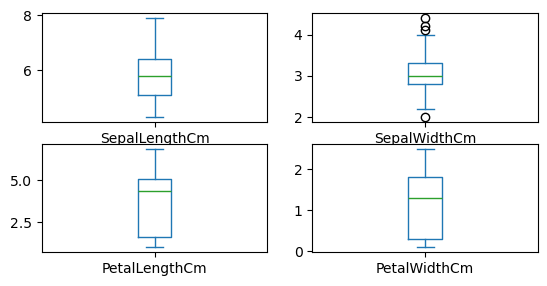

In [103]:
dataset.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)
pyplot.show()

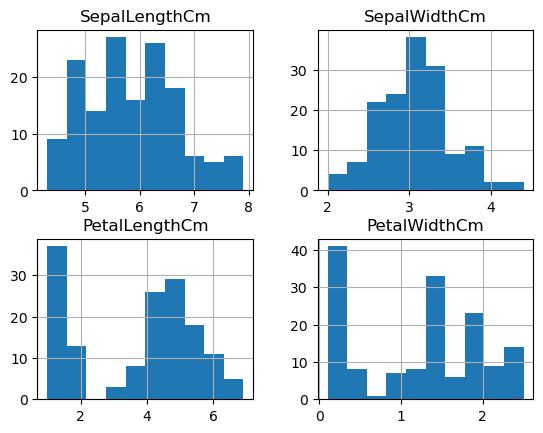

In [105]:
dataset.hist()
pyplot.show()

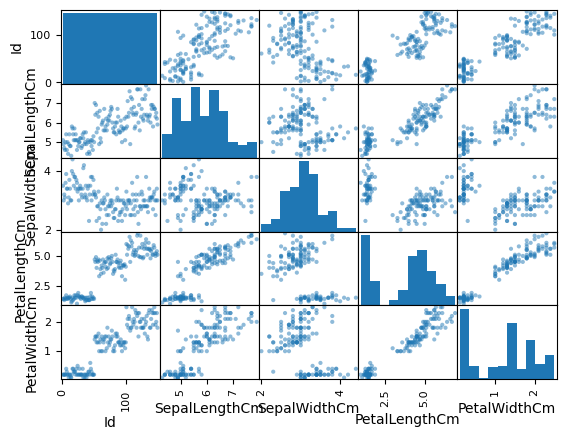

In [49]:
scatter_matrix(dataset)
pyplot.show()

In [107]:
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_validation, Y_train, Y_valildation = train_test_split(X, y, test_size=0.2, random_state=1)

In [109]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [111]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


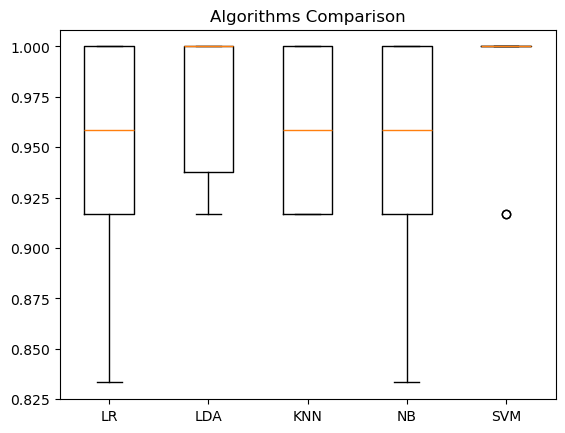

In [113]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithms Comparison')
pyplot.show()

In [115]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report())